# Importing libraries

In [70]:
import random

import numpy as np
import pandas as pd

In [71]:
import plotly.express as px
from plotly import graph_objects as go

# Creating data

In [72]:
N_SAMPLES = 500

In [73]:
list_funnel = ["FUNNEL {}".format(str(np.random.randint(0, 7))) for _ in range(N_SAMPLES)]
list_index_location = random.sample(range(10000), N_SAMPLES)

In [74]:
dict_type_funnel = {"FUNNEL 1": "Potencial Encerramento",
                    "FUNNEL 2": "Ags Reformadas (PD + EI)",
                    "FUNNEL 3": "Remanejamento (Imóvel antigo)",
                    "FUNNEL 4": "AVCB Crítico",
                    "FUNNEL 5": "Itaú Rent",
                    "FUNNEL 6": "Ags que serão reformadas (PD + EI)",
                    "PD": "Saldo PD"}

## Renaming class: 'funell 0' to ''

In [75]:
list_funnel_updated = ["PD" if value == "FUNNEL 0" else value for value in list_funnel]

In [76]:
df = pd.DataFrame({"LOCATION": list_index_location, "GROUP FUNNEL": list_funnel_updated})

In [77]:
df['GROUP FUNNEL LABEL'] = df['GROUP FUNNEL'].replace(dict_type_funnel)

## Creating groupby by 'group funnel'

In [78]:
df_groupby_count_funnel = df.groupby(["GROUP FUNNEL", "GROUP FUNNEL LABEL"]).size().reset_index(name="QUANTIDADE")

In [79]:
df_groupby_count_funnel

,GROUP FUNNEL,GROUP FUNNEL LABEL,QUANTIDADE
0,FUNNEL 1,Potencial Encerramento,70
1,FUNNEL 2,Ags Reformadas (PD + EI),73
2,FUNNEL 3,Remanejamento (Imóvel antigo),67
3,FUNNEL 4,AVCB Crítico,68
4,FUNNEL 5,Itaú Rent,69
5,FUNNEL 6,Ags que serão reformadas (PD + EI),78
6,PD,Saldo PD,75


# Funnel 1

In [80]:
update_figure_size = True
update_legend = True
update_title =True

In [81]:
# CHOOSING COLORS
colors = ["#f94144", "#f3722c", "#f8961e", "#f9c74f", "#90be6d", "#43aa8b", "#577590"]

# CREATING FIGURE
fig = go.Figure(go.Funnelarea(
                values=df_groupby_count_funnel["QUANTIDADE"],
                text=df_groupby_count_funnel["GROUP FUNNEL"],
                textposition = "inside",
                labels=df_groupby_count_funnel["GROUP FUNNEL LABEL"],
                hovertemplate='<b>%{text}</b><br>' +
                              '<b>%{label}</b><br>' +
                              '<b>%{value}</b><br>' +
                              '<b>%{percent}</b>',
                textinfo = "value+label+percent",
                textfont = {"family": "Arial, serif", "color": "black"}, opacity = 0.95,
                marker=dict(colors=colors)))

if update_legend:

  # UPDATING LEGEND
  fig.update_layout(legend_title_text="Classification - Funnel - PD")
  fig.update_yaxes(title_text="Classification - Funnel - PD")

  fig.update_layout(legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=0.90,
      font=dict(family="Rockwell",
                                  size=16,
                                  color="black")
                    )
    )

if update_title:

  # UPDATING TITLE
  fig.update_layout(
      font_family="Arial",
      font_color="black",
      title_font_family="Times New Roman",
      title_font_color="black",
      title_font_size=30,
      legend_title_font_color="black"
  )

  fig.update_layout(
      title={
          'text': "Funnel - PD",
          'x': 0.50,
          'xanchor': 'center',
          'yanchor': 'top'})

  fig.update_traces(textposition='inside',
                    textfont=dict(family="Rockwell",
                                  size=20,
                                  color="white")
                    )

# UPDATING HOVER
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

if update_figure_size:

  # UPDATING FIGURE SIZE
  fig.update_layout(
      autosize=True,
      width=1300,
      height=600,
      margin=dict(
          l=300,
          r=300,
          b=100,
          t=100,
          pad=1
      ),
      paper_bgcolor="white",
  )

  fig.update_yaxes(automargin=False)

fig.show()

# Funnel 2

In [82]:
df_groupby_count_funnel.sort_values(by="QUANTIDADE", ascending=False)

,GROUP FUNNEL,GROUP FUNNEL LABEL,QUANTIDADE
5,FUNNEL 6,Ags que serão reformadas (PD + EI),78
6,PD,Saldo PD,75
1,FUNNEL 2,Ags Reformadas (PD + EI),73
0,FUNNEL 1,Potencial Encerramento,70
4,FUNNEL 5,Itaú Rent,69
3,FUNNEL 4,AVCB Crítico,68
2,FUNNEL 3,Remanejamento (Imóvel antigo),67


In [83]:
fig = px.funnel(df_groupby_count_funnel.sort_values(by="QUANTIDADE", ascending=False),
                y='GROUP FUNNEL LABEL', x='QUANTIDADE', color='GROUP FUNNEL',
                template="simple_white",
                title='Beskar Forging Services Inc.',
                labels={"Stage": ""})
fig.show()

In [84]:
df_groupby_count_funnel

,GROUP FUNNEL,GROUP FUNNEL LABEL,QUANTIDADE
0,FUNNEL 1,Potencial Encerramento,70
1,FUNNEL 2,Ags Reformadas (PD + EI),73
2,FUNNEL 3,Remanejamento (Imóvel antigo),67
3,FUNNEL 4,AVCB Crítico,68
4,FUNNEL 5,Itaú Rent,69
5,FUNNEL 6,Ags que serão reformadas (PD + EI),78
6,PD,Saldo PD,75


# Pictogram

In [85]:
df_groupby_count_funnel

,GROUP FUNNEL,GROUP FUNNEL LABEL,QUANTIDADE
0,FUNNEL 1,Potencial Encerramento,70
1,FUNNEL 2,Ags Reformadas (PD + EI),73
2,FUNNEL 3,Remanejamento (Imóvel antigo),67
3,FUNNEL 4,AVCB Crítico,68
4,FUNNEL 5,Itaú Rent,69
5,FUNNEL 6,Ags que serão reformadas (PD + EI),78
6,PD,Saldo PD,75


# Pictogram with PyWaffle

In [86]:
!pip install pywaffle

In [87]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [88]:
df_groupby_count_funnel = df_groupby_count_funnel.set_index("GROUP FUNNEL LABEL")

In [126]:
df_groupby_count_funnel["PERCENT"] = round(100*df_groupby_count_funnel["QUANTIDADE"]/df_groupby_count_funnel["QUANTIDADE"].sum(), 0)

In [127]:
df_groupby_count_funnel

,GROUP FUNNEL,QUANTIDADE,PERCENT
GROUP FUNNEL LABEL,,,
Potencial Encerramento,FUNNEL 1,70,14.0
Ags Reformadas (PD + EI),FUNNEL 2,73,15.0
Remanejamento (Imóvel antigo),FUNNEL 3,67,13.0
AVCB Crítico,FUNNEL 4,68,14.0
Itaú Rent,FUNNEL 5,69,14.0
Ags que serão reformadas (PD + EI),FUNNEL 6,78,16.0
Saldo PD,PD,75,15.0


In [128]:
df_groupby_count_funnel["PERCENT"].to_dict()

{'Potencial Encerramento': 14.0,
 'Ags Reformadas (PD + EI)': 15.0,
 'Remanejamento (Imóvel antigo)': 13.0,
 'AVCB Crítico': 14.0,
 'Itaú Rent': 14.0,
 'Ags que serão reformadas (PD + EI)': 16.0,
 'Saldo PD': 15.0}

In [129]:
data = df_groupby_count_funnel["PERCENT"].to_dict()

In [139]:
colors = ["#f94144", "#f3722c", "#f8961e", "#f9c74f", "#90be6d", "#43aa8b", "#577590"]
icons = ['xmark', 'wrench', 'suitcase-rolling', 'fire', 'building', 'house-crack', 'check-to-slot']

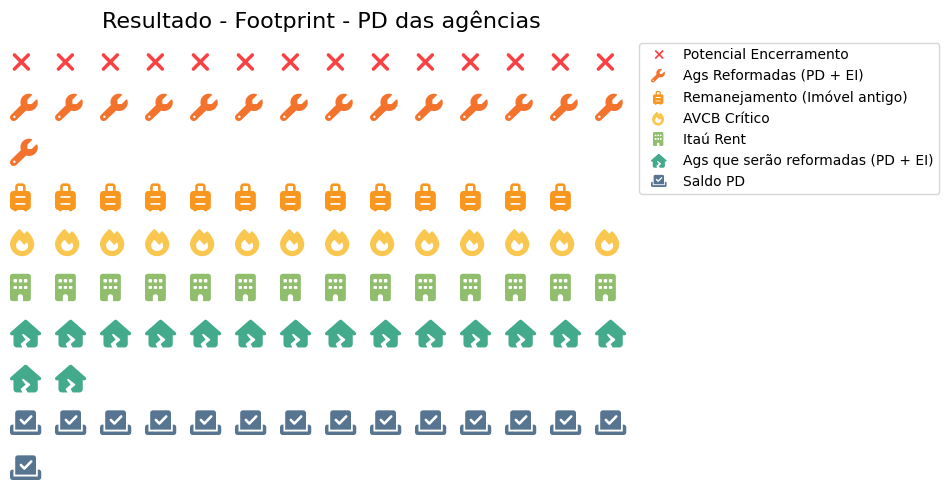

In [148]:
fig = plt.figure(FigureClass=Waffle,
                 figsize=(15,5),
                 values=data,
                 columns=int(100/7),
                 colors=colors,
                 icons=icons,
                 font_size=20,
                 icon_style='solid',
                 icon_legend=True,
                 vertical=True,
                 starting_location='NW',
                 block_arranging_style='new-line',
                 legend={
                    'labels': list(data.keys()),
                    'loc': 'upper left',
                    'bbox_to_anchor': (1, 1)
                })
plt.title ('Resultado - Footprint - PD das agências', fontsize=16)
plt.show()

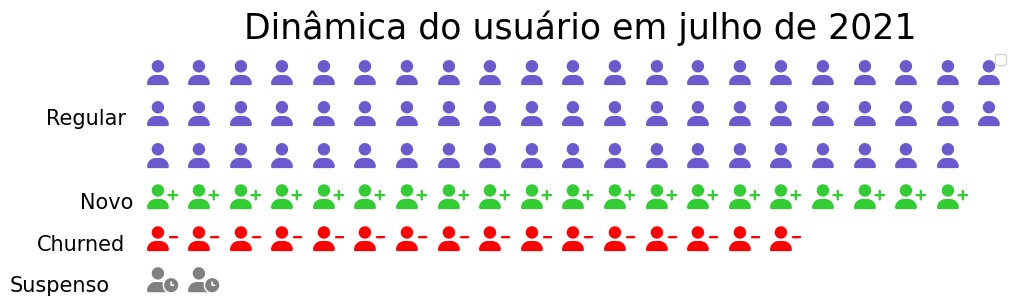

In [22]:
fig = plt.figure(FigureClass=Waffle,
                 figsize=(9,7),
                 values=dict_users,
                 columns=21,
                 vertical=True,
                 starting_location='NW',
                 block_arranging_style='new-line',
                 colors=list(colors. values()),
                 icons=['user','user-plus', 'user-minus', 'user-clock'],
                 font_size=
                 18)
plt.title('Dinâmica do usuário em julho de 2021', fontsize=25 )
fig.text(x=-0.095, y=0.562, s='Regular', fontsize=15)
fig.text(x=-0.057, y=0.441, s='Novo', fontsize=15)
fig.text (x=-0.105, y=0.382, s='Churned', fontsize=15)
fig.text(x=-0.135, y=0.323, s='Suspenso', fontsize=15)
plt.legend([])
plt.show()

# Waffle chart with Plotly

In [23]:
m= 6
n= 10
z = np.ones((m, n))
z[2:, 7] = 2
z[:4, 8] = 2
z[0, 9] = 2
z[1:, 9] = 3

#dictionary that maps the heatmap z-values to strings
d = {1: "Liberal",
    2: "Conservative",
    3: "New Wave",
    }
M = max([len(s) for s in d.values()])
customdata= np.empty((m,n), dtype=f'<U{M}')  #supplementary information on each waffle cell

for i in range(m):
    for j in range(n):
        customdata[i,j] = d[z[i, j]]

In [24]:
customdata

array([['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Liberal', 'Conservative', 'Conservative'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Liberal', 'Conservative', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Conservative', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Conservative', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Liberal', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Liberal', 'New Wave']], dtype='<U12')

In [25]:
#Normalizing the three possible z-values we get 1/3, 2/3, 1;
# define a discrete colorscale that maps 1/3, 2/3, 1 to distinct colors:
colorscale = [[0, "#00cc96"],
              [0.33, "#00cc96"],
              [0.33, "#636efa"],
              [0.66,  "#636efa"],
              [0.66, "#e763fa" ],
              [1, "#e763fa"]]

xlabels = ['Acu', 'Hku', 'Hga', 'Aeo', 'Rlw', 'Eqh', 'Qrx', 'Twu', 'Mvq', 'Xnl']
ylabels = ['Cqu', 'Hcv', 'Ijp', 'Vio', 'Wmt', 'Ljf']


fig = go.Figure(go.Heatmap(x=xlabels, y = ylabels, z=z,
                           customdata=customdata, xgap=3, ygap=3,
                           colorscale=colorscale, showscale=False,
                           hovertemplate="(%{y}, %{x}): %{customdata})<extra></extra>"))
fig.update_layout(width=600, height=450, yaxis_autorange='reversed')